<a href="https://colab.research.google.com/github/Otabek-Rizayev/AI-Models/blob/main/CNN_CutDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import fastai

print(torch.__version__)
print(fastai.__version__)

2.5.1+cu121
2.7.18


In [3]:
# kutubxonlar
from fastai.vision.all import *
from ipywidgets import widgets

# data
path = untar_data(URLs.PETS)/'images'

# labellovchi funksiya
def is_cat(x): return x[0].isupper()

# datalarni yuklovchi (dataloaders)
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

# o'qitish (train)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 147MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.175675,0.020857,0.992558,00:48


epoch,train_loss,valid_loss,accuracy,time
0,0.062652,0.029607,0.992558,00:51
1,0.029644,0.007897,0.997294,00:49


In [4]:
# rasm yuklash uchun widget
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Mushukmi?: True
Aniqlilik ehtimologi: 1.000


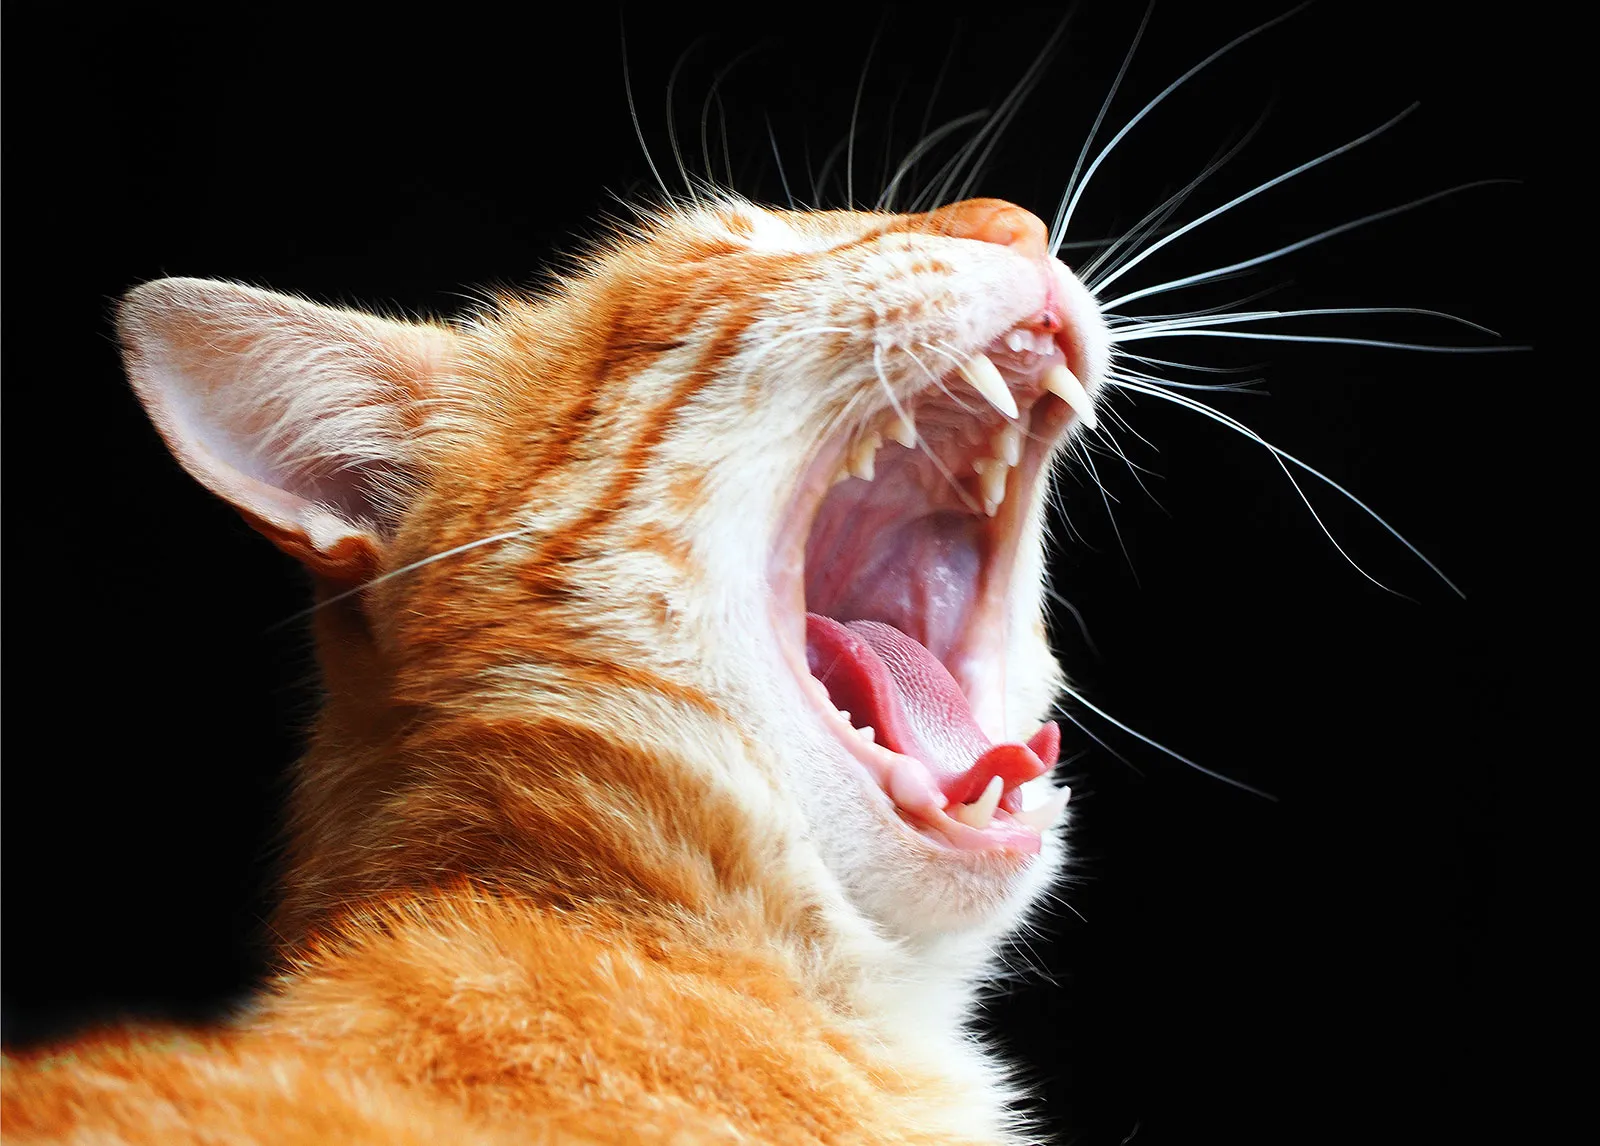

In [7]:
img = PILImage.create(upload.data[-1]) # rasm
pred, _, prob = learn.predict(img) # bashorat qilish (predict)
print(f'Mushukmi?: {pred}')
print(f'Aniqlilik ehtimologi: {prob[1].item():.3f}')
img